# Big Data Final Assessment

## Group 4

> Sergi Capdevila ( ```#SC``` )  
> Benedict Greenberg ( ```#BSG``` )  
> Sara Khan ( ```#SK``` )  
> Jiachen Yu ( ```#JY``` )  

## Dataset: Breast Cancer Wisconsin (Diagnostic)
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
# Import all necessary modules

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, accuracy_score,\
precision_score, recall_score
from sklearn import tree, svm, ensemble
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from IPython.display import Image
import pydotplus 


sns.set(style = 'ticks', font_scale = 1.8)
RANDSEED = 42

np.random.seed(RANDSEED)

%matplotlib inline

/Users/bengreenberg/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Import dataset

This dataset has been modified from the original to include an extra column next to '*diagnosis*' called '*diagnosis_bin*'. This is a binary alteration to translate 'B' (benign) and 'M' (malicious) to 0 and 1.

This leads us to our statistics analysis question: **"Is the tumor a malicious one?"** with answer: **1 (yes) or 0 (no)**

In [2]:
# BSG
data = pd.read_csv('cancer_dataset.csv') # Import dataset
data.head()

,id,diagnosis,diagnosis_bin,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# BSG
print "DATA SPLIT BETWEEN B/M:"
counts = data['diagnosis'].value_counts()
b_pc = (counts[0] *1.0 / len(data['diagnosis']))*100.0
m_pc = (counts[1] *1.0 / len(data['diagnosis']))*100.0

print "Total: ", len(data['diagnosis'])
print "B: %-3d (%-2d%%)" % (counts[0],b_pc)
print "M: %-3d (%-2d%%)" % (counts[1],m_pc)

DATA SPLIT BETWEEN B/M:
Total:  569
B: 357 (62%)
M: 212 (37%)


The head of the dataframe shows us how the data is arranged. All the input variables are positioned on the right. We can see that these are all continuous variables. The output is located on the left ( ```diagnosis_bin``` ) which we are trying to predict and explain.

The first two columns we mostly ignore ( ```diagnosis``` , ```id``` ).

We run a check below to study the content of each column. It shows us that the variables are *non-null* and *float*. It also shows us there is no missing data (569 elements in every column). 

In [4]:
# BSG
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
diagnosis_bin              569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-n

Each of these variables refer to a measurable metric with regards to the patient's (identified with ```id```) tumor. 

**```mean```** refers to the average measurement taken at time of record.  
**```se```** refers to the standard error when taking the record.  
**```worst```** refers to the worst measurement when taking the record.  

In [5]:
# BSG
print "This is an alternative test to check if there are any null values in the dataset."
print "There should be no null data entries in any column.\n"
print data.isnull().sum()

This is an alternative test to check if there are any null values in the dataset.
There should be no null data entries in any column.

id                         0
diagnosis                  0
diagnosis_bin              0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst         

## Dummies

Dummy variables are used to convert categorical variables into individual variables with boolean evaluation for every row in the data. This ensures that the statistical models handle the categorical data correctly.

Since our data input is **purely continuous** we do not need to use dummy variables.

Example code of how to clean data and add dummy variables:  
`data_clean = pd.get_dummies(data)
data_clean.head()`

## Exploratory

We began with study general relationships between different variables and their effect on the output variable ```diagnosis_bin```. This helped us understand that there are strong differences between the effect of one variable compared to another. Below are logit plots of the comparisons, along with their respective deviance when fitting to a GLM model.

_**NB.** It is important to note that in the graphs displayed below the values are jittered on the y axis. This is so that they are easier to view, whereas in reality, all these datapoints are either **1** or **0**._

Effect of AREA_MEAN on output. Deviance is:  325.656511147


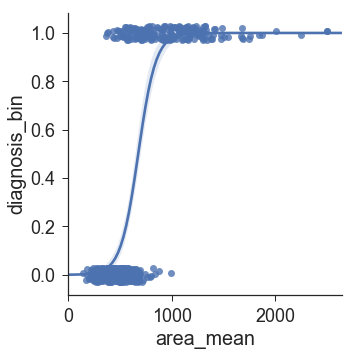

Effect of TEXTURE_MEAN on output. Deviance is:  646.519127153


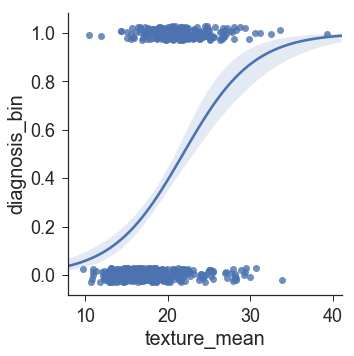

Effect of SYMMETRY_SE on output. Deviance is:  751.415741209


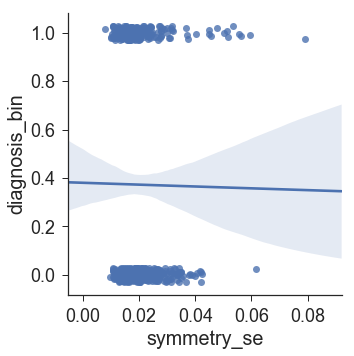

Effect of PERIMETER_WORST on output. Deviance is:  209.47994078


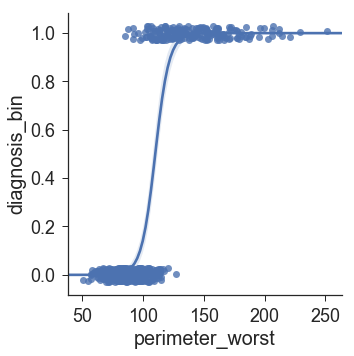

In [6]:
# BSG
print "Effect of AREA_MEAN on output. Deviance is: ", smf.glm(formula = 'diagnosis_bin~area_mean', data = data, \
                                                              family = sm.families.Binomial()).fit().deviance
sns.lmplot(x="area_mean", y="diagnosis_bin", data=data, logistic=True, y_jitter=.03);
sns.plt.show()

print "Effect of TEXTURE_MEAN on output. Deviance is: ", smf.glm(formula = 'diagnosis_bin~texture_mean', data = data, \
                                                                 family = sm.families.Binomial()).fit().deviance
sns.lmplot(x="texture_mean", y="diagnosis_bin", data=data, logistic=True, y_jitter=.03);
sns.plt.show()

print "Effect of SYMMETRY_SE on output. Deviance is: ", smf.glm(formula = 'diagnosis_bin~symmetry_se', data = data, \
                                                                family = sm.families.Binomial()).fit().deviance
sns.lmplot(x="symmetry_se", y="diagnosis_bin", data=data, logistic=True, y_jitter=.03);
sns.plt.show()

print "Effect of PERIMETER_WORST on output. Deviance is: ", smf.glm(formula = 'diagnosis_bin~perimeter_worst', data = data, \
                                                                    family = sm.families.Binomial()).fit().deviance
sns.lmplot(x="perimeter_worst", y="diagnosis_bin", data=data, logistic=True, y_jitter=.03);
sns.plt.show()

Following this early exploratory stage we then decided to find out how all the different variables correlated to a logit function of the desired output: **diagnosis**.

In [7]:
# BSG
col_heads = data.columns[3:]
variables = []
for name in col_heads:
    variables.append(name)

For this we took the variables, fitted each one in a to a binomial GLM and then extracted the deviance from each model. These were then ranked in order so we could see which variable had the best explanatory relationship for the diagnosis of the tumor. We are looking for the lowest deviance as this shows that is fits the model best.

In [8]:
# BSG
base_str = 'diagnosis_bin~' # start of the formula string
devs2 = []
for suffix in variables: # for each column heading
    formula = base_str+suffix # construct the glm formula
    glm = smf.glm(formula = formula, data = data, family = sm.families.Binomial()).fit()
    devs2.append(glm.deviance) # append the deviance from the glm model to a list of deviances
    
print "Deviances have been calculated.\n"

# Now we sort the two lists, variable name and its respective deviance, by deviance in ascending order
devs2_sorted, vars_sorted = (list(t) for t in zip(*sorted(zip(devs2, variables))))

print "--- LIST OF VARIABLES BY DEVIANCE ---\n"
print "%-25s" "%s\n" % ('VARIABLE NAME','DEVIANCE')
for i in range(0,30):
    print "%-25s" "%s" % (vars_sorted[i],devs2_sorted[i])

Deviances have been calculated.

--- LIST OF VARIABLES BY DEVIANCE ---

VARIABLE NAME            DEVIANCE

perimeter_worst          209.47994078
radius_worst             229.108516988
area_worst               230.639323335
concave_points_worst     250.450768147
concave_points_mean      258.923407417
perimeter_mean           304.484393493
area_mean                325.656511147
radius_mean              330.010843988
area_se                  359.502591777
concavity_mean           383.227215945
concavity_worst          437.69762011
perimeter_se             472.829843848
radius_se                480.646730273
compactness_worst        505.552950418
compactness_mean         508.791919042
texture_worst            622.068225887
symmetry_worst           641.41675566
smoothness_worst         641.424953525
concave_points_se        646.00703847
texture_mean             646.519127153
smoothness_mean          673.948456556
symmetry_mean            686.796169526
fractal_dimension_worst  689.389445032


## Selecting our variables for model formula

So far we have successfully found which independent variables relate well to the desired output, the diagnosis, however we do not know how these variables looked at together, can correlate with the diagnosis. For this there are multiple methods and so we employed a few techniques to compare.

### The Absolute Method (Computation-Heavy)

The first method we employed was an absolute approach to finding the best formula for our initial models. This algorithm works in two main steps.

> __It produces a list of possible formulas, up to 4 variables in length.__

This means that the every possible combination of the 30 input variables are combined into possible GLM formulas, but only up to four variables are used in a formula. This is done for two reasons. We believe that any more than four variables in the formula would result in overfitting the data.

We also only analysed the variables in combination with one another ' __```+```__ ' but not with variables *interacting* with one another ' __```*```__ '. 

> __It takes each possible formula, fits to a binomial GLM, and records the deviance.__
 
This is done to find which formulas fit the output (diagnosis) the best. By running this function, we were able to significantly reduce the deviance for the GLM model. _Please be aware that since the cell below is calculating the deviance (when fitting to a GLM) for almost 32,000 formulas, it takes about 10 minutes to run._

In [9]:
# BSG
from IPython.display import clear_output
import time

variables = []
for name in col_heads:
    variables.append(name) # store column names in list of variables

results = []
joiner = '+'
# Nested for loop which creates every combination of formula for 1 to 4 input variables
for i in range(0,len(variables)):
    elements = variables[i]
    results.append(elements)
    for j in range(i+1,len(variables)):
        elements = [variables[i],variables[j]]
        fstr = joiner.join(elements)
        results.append(fstr)
        for k in range(j+1,len(variables)):
            elements = [variables[i],variables[j],variables[k]]
            fstr = joiner.join(elements)
            results.append(fstr)
            for l in range(k+1,len(variables)):
                elements = [variables[i],variables[j],variables[k],variables[l]]
                fstr = joiner.join(elements)
                results.append(fstr)

print "Formula generation complete."
print "%d formula variations have been created.\n" % len(results)

base_str = 'diagnosis_bin~'
devs = []
start_time = time.time()
for i in range(0,len(results)): # for loop creates a GLM for each formula and stores the deviances
    formula = base_str+results[i]
    glm = smf.glm(formula = formula, data = data, family = sm.families.Binomial()).fit()
    devs.append(glm.deviance)
    pc = ( i*1.0 / len(results) ) * 100.0
    clear_output(wait=True)
    print "Formula generation complete."
    print "%d formula variations have been created.\n" % len(results)
    print "Building models and finding deviance..."
    
    complete = '#'*int(pc/5.0)
    remaining = ' '*(20-int(pc/5.0))
    seconds = time.time() - start_time
    m, s = divmod(seconds, 60)
    
    if pc == 0: pc = 0.00001
    t_rem = (seconds*1.0/pc) * (100.0-pc)
    m2, s2 = divmod(t_rem, 60)

    if m2 == 0: print "%4.1f %% |%s%s| Time: %02d:%02d | Remaining: < 1 min" % (pc,complete,remaining,m,s)
    else: print "%4.1f %% |%s%s| Time: %02d:%02d | Remaining: %d min" % (pc,complete,remaining,m,s,m2)
        
clear_output(wait=True)
print "Formula generation complete."
print "%d formula variations have been created.\n" % len(results)
print "Building models and finding deviance...complete"
print " 100 %% |####################| Time: %02d:%02d | Remaining: COMPLETE\n" % (m,s)

print "Sorting data..."
devs_sorted, forms_sorted = (list(t) for t in zip(*sorted(zip(devs, results))))

print "Displaying best 50 formulas...\n"
print "%-20s" "%s\n" % ('DEVIANCE','GLM FORMULA')
for i in range(0,50):
    print "%-20s" "%s" % (devs_sorted[i],forms_sorted[i])

Formula generation complete.
31930 formula variations have been created.

Building models and finding deviance...complete
 100 % |####################| Time: 08:45 | Remaining: COMPLETE

Sorting data...
Displaying best 50 formulas...

DEVIANCE            GLM FORMULA

82.2911863344       radius_se+texture_worst+area_worst+concave_points_worst
82.3422101794       perimeter_mean+concave_points_mean+texture_worst+area_worst
82.6044838016       texture_mean+perimeter_mean+concave_points_mean+area_worst
83.0138167487       area_se+texture_worst+area_worst+concave_points_worst
83.4111987595       radius_mean+concave_points_mean+texture_worst+area_worst
84.4050011072       area_se+radius_worst+texture_worst+concave_points_worst
84.5602438041       radius_se+radius_worst+texture_worst+concave_points_worst
84.6983161579       radius_mean+texture_mean+concave_points_mean+area_worst
85.6311764281       area_mean+concave_points_mean+texture_worst+area_worst
87.2049522528       radius_se+texture_wor

The results from the code cell above showed us from the __31930 formula variations__ that were created, the following formulas were the best (__10 lowest deviances__):

|DEVIANCE            |GLM FORMULA|
|-|-|
|82.2911863344       |radius_se+texture_worst+area_worst+concave_points_worst|
|82.3422101794       |perimeter_mean+concave_points_mean+texture_worst+area_worst|
|82.6044838016       |texture_mean+perimeter_mean+concave_points_mean+area_worst|
|83.0138167487       |area_se+texture_worst+area_worst+concave_points_worst|
|83.4111987595       |radius_mean+concave_points_mean+texture_worst+area_worst|
|84.4050011072       |area_se+radius_worst+texture_worst+concave_points_worst|
|84.5602438041       |radius_se+radius_worst+texture_worst+concave_points_worst|
|84.6983161579       |radius_mean+texture_mean+concave_points_mean+area_worst|
|85.6311764281       |area_mean+concave_points_mean+texture_worst+area_worst|
|87.2049522528       |radius_se+texture_worst+perimeter_worst+smoothness_worst|

### Testing the formula

Now that our absolute method produced an optimum formula (with max. variables = 4) we can use this to test how well it performs with training and test data groups. Below we take the cancer dataset stored in __```data```__ and split it into 80/20 train/test groups.

We then do a quick check to ensure that when the data was split, it did not unbalance the diagnosis output.

In [10]:
# BSG
train, test = train_test_split(data, test_size=0.2, random_state=42) # split the data into train and test sets

print "ORIGINAL DATA SPLIT BETWEEN B/M:"
counts = data['diagnosis'].value_counts()
b_pc = (counts[0] *1.0 / len(data['diagnosis']))*100.0
m_pc = (counts[1] *1.0 / len(data['diagnosis']))*100.0
print "Total: ", len(data['diagnosis'])
print "B: %-3d (%-2d%%)" % (counts[0],b_pc)
print "M: %-3d (%-2d%%)" % (counts[1],m_pc)

print "\nTRAIN DATA SPLIT B/M:"
counts = train['diagnosis'].value_counts()
b_pc = (counts[0] *1.0 / len(train['diagnosis']))*100.0
m_pc = (counts[1] *1.0 / len(train['diagnosis']))*100.0
print "Total: ", len(train['diagnosis'])
print "B: %-3d (%-2d%%)" % (counts[0],b_pc)
print "M: %-3d (%-2d%%)" % (counts[1],m_pc)

print "\nTEST DATA SPLIT B/M:"
counts = test['diagnosis'].value_counts()
b_pc = (counts[0] *1.0 / len(test['diagnosis']))*100.0
m_pc = (counts[1] *1.0 / len(test['diagnosis']))*100.0
print "Total: ", len(test['diagnosis'])
print "B: %-3d (%-2d%%)" % (counts[0],b_pc)
print "M: %-3d (%-2d%%)" % (counts[1],m_pc)

ORIGINAL DATA SPLIT BETWEEN B/M:
Total:  569
B: 357 (62%)
M: 212 (37%)

TRAIN DATA SPLIT B/M:
Total:  455
B: 286 (62%)
M: 169 (37%)

TEST DATA SPLIT B/M:
Total:  114
B: 71  (62%)
M: 43  (37%)


### Checking the accuracy of the model with this formula

Once we had a formula (either by using the full dataset or training dataset) we had to produce values to check how accurate the model would be. This is another way of checking that the formula (and corresponding model) has not overfit the dataset.

Accuracy: 97.4%
Precision: 97.6%
Recall: 95.3%


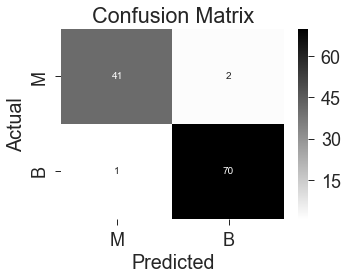

In [11]:
# BSG

# Use the 'best' formula to create a GLM model
formula = 'diagnosis_bin~radius_se+texture_worst+area_worst+concave_points_worst'
glm_best = smf.glm(formula = formula, data = train, family = sm.families.Binomial()).fit()

# Split into training and test sets
x_train = train[variables]
y_train = train['diagnosis_bin']
x_test = test[variables]
y_test = test['diagnosis_bin']

# Note that labels = [1,0] ensures that are 'positive' class corresponds to diagnosis_bin = 1.
conf_mat = confusion_matrix(y_test, glm_best.predict(x_test)>0.5, labels = [1, 0])

TP = float(conf_mat[0][0])
FN = float(conf_mat[0][1])
FP = float(conf_mat[1][0])
TN = float(conf_mat[1][1])

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

print "Accuracy: %-4.1f%%" % (accuracy * 100.0)
print "Precision: %-4.1f%%" % (precision * 100.0)
print "Recall: %-4.1f%%" % (recall * 100.0)

df_cm = pd.DataFrame(conf_mat, index = ['M', 'B'], columns = ['M', 'B'])
plt.figure(figsize = (5,3.5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap = 'binary')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The result from the use of out _test_ dataset was that the GLM produces a fairly good predictor of the output, diagnosis. The worst case scenario (predict _benign_ when actually _malicious_) only occured __twice in 114__ people (1.8%).

## Building predictive models: Decision Tree Classifier

This predictive model uses the recommended formula and train/test datasets from the previous section. It does not look for the best model by looking at the variables, but instead looks at the best way to build a model (tree). 

The Decision Tree creates a tree and looks for the values of __```max_depth```__ and __```min_impurity_split```__ to create the best tree possible. It does this by providing the __```.best_estimator_```__ attribute. This attribute provides the best possible tree; the parameters used to find this tree can be found by calling the attributes: __```.best_params_['max_depth']```__ and __```.best_params_['min_impurity_split']```__.

In [12]:
# SC

dectree = tree.DecisionTreeClassifier()

parameters_tree = {'min_impurity_split': np.linspace(0,0.2,20),'max_depth':range(2,8)}

print "Finding super tree with Cross Validated Grid Search..."
super_tree = GridSearchCV(dectree, parameters_tree, cv=10, scoring='accuracy')
super_tree.fit(x_train,y_train)
bestcancertree = super_tree.best_estimator_  

# Get the parameters which found the best tree
mdepth = super_tree.best_params_['max_depth']
mis = super_tree.best_params_['min_impurity_split']

print "\n--- PARAMETERS ---\n"
print "Max_Depth:          %.02f" % mdepth
print "Min_Impurity_Split: %.02f" % mis

print "\n--- TRAINING SET ---\n"
print "Accuracy:  %-4.1f%%" % (accuracy_score(y_train, bestcancertree.predict(x_train))*100.0)
print "Precision: %-4.1f%%" % (precision_score(y_train, bestcancertree.predict(x_train))*100.0)
print "Recall:    %-4.1f%%" % (recall_score(y_train, bestcancertree.predict(x_train))*100.0)


print '\n--- TEST SET ---\n'
print "Accuracy:  %-4.1f%%" % (accuracy_score(y_test, bestcancertree.predict(x_test))*100.0)
print "Precision: %-4.1f%%" % (precision_score(y_test, bestcancertree.predict(x_test))*100.0)
print "Recall:    %-4.1f%%" % (recall_score(y_test, bestcancertree.predict(x_test))*100.0)

Finding super tree with Cross Validated Grid Search...

--- PARAMETERS ---

Max_Depth:          4.00
Min_Impurity_Split: 0.03

--- TRAINING SET ---

Accuracy:  98.9%
Precision: 98.8%
Recall:    98.2%

--- TEST SET ---

Accuracy:  94.7%
Precision: 95.1%
Recall:    90.7%


Next, ten iterations of cross validation from the dataset were used to find a mean accuracy, presion and recall which are more accurate. By using 10 random iterations the model is both tested on a range of different data.

This cross validation uses the 'best' tree according to the supertree grid search. Granted, it was created using a specific training set. But, once tested with test sets, the results for quality of the best tree possible where highly similar. 

In [13]:
# SC
scores = cross_val_score(bestcancertree, x_test, y_test, cv=10, scoring='accuracy') 
print "Mean ACCURACY from the cross-validation: %-4.1f%%" % (np.mean(scores)*100.0)
print "Full vector: [%s]" % (', '.join(map("{:.3f}".format, scores) ))

scores2 = cross_val_score(bestcancertree, x_test, y_test, cv=10, scoring='precision') 
print "\nMean PRECISION from the cross-validation: %-4.1f%%" % (np.mean(scores2)*100.0)
print "Full vector: [%s]" % (', '.join(map("{:.3f}".format, scores2)))

scores3 = cross_val_score(bestcancertree, x_test, y_test, cv=10, scoring='recall') 
print "\nMean RECALL from the cross-validation: %-4.1f%%" % (np.mean(scores3)*100.0)
print "Full vector: [%s]" % (', '.join(map("{:.3f}".format, scores3)))

Mean ACCURACY from the cross-validation: 92.9%
Full vector: [0.923, 1.000, 1.000, 0.909, 1.000, 0.909, 0.909, 0.909, 0.909, 0.818]

Mean PRECISION from the cross-validation: 96.0%
Full vector: [1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.800, 0.800]

Mean RECALL from the cross-validation: 86.0%
Full vector: [0.800, 0.800, 1.000, 0.750, 1.000, 0.750, 0.750, 0.750, 1.000, 1.000]


Following this cross-validation check, we can visualise a prediction tree. This tree uses the train data to predict a diagnosis depending on the used variables. Such tree has an Accuracy of 95.6%, Precision of 96.0% and Recall of 91.0%.

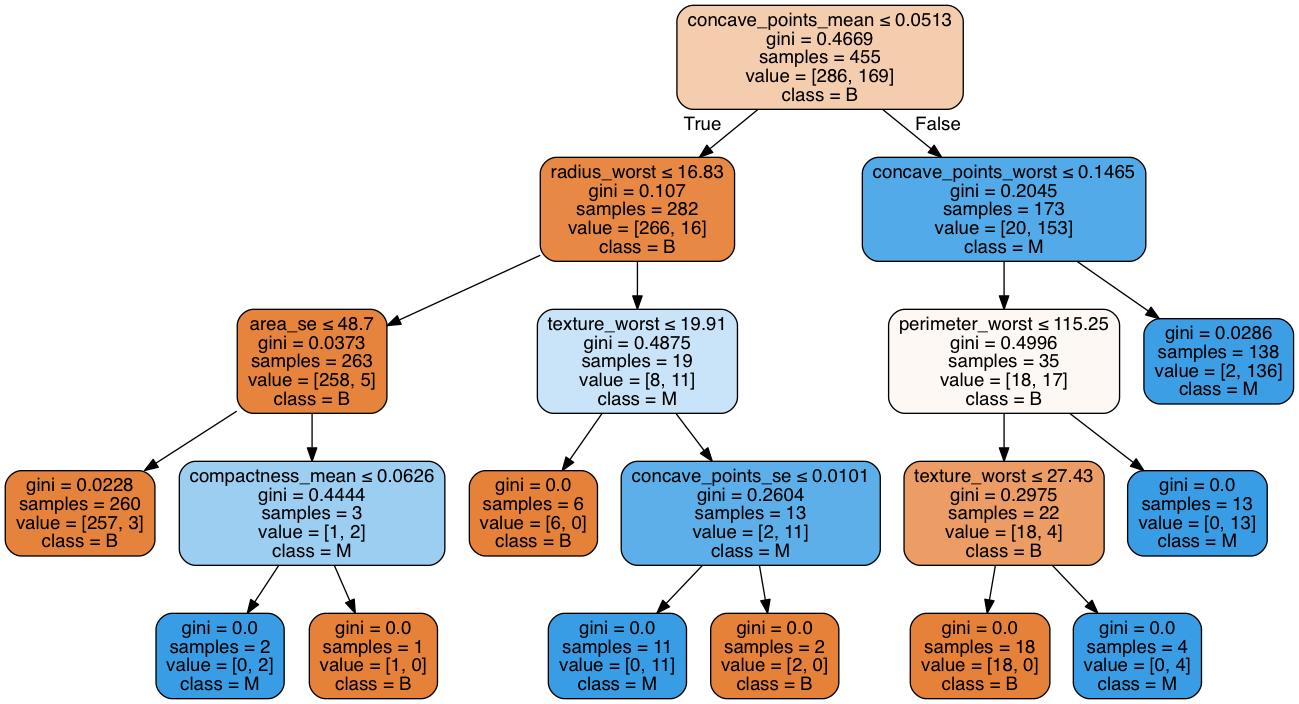

In [14]:
# SC
dot_data = tree.export_graphviz(bestcancertree, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 


dot_data = tree.export_graphviz(bestcancertree, out_file=None,
                                feature_names = variables,
                                class_names = ('B', 'M'),
                                filled = True, rounded = True,
                                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Forward Selection (alternative formula building method)

An alternative method of finding the best formula is using a 'greedy' forward selection function.

The dataset is split into train and test sets. Using the train data, the function fits each parameter into a standard GLM model and finds the deviances. By sorting the deviance scores, the parameter with lowest deviance is selected as a part of the formula and will not be used in computation again.

The number of parameters in the final formula can be adjusted by changing the threshold. The threshold was decided to be 0.2 so that there would be 3 to 4 parameters used in the formula. By preventing the use of too many parameters, we prevent overfitting to the training dataset.

The best formula significantly depends on how the dataset is split. By randomising the split, 21 groups of parameters were obtained. Tree test was used to find the group of parameters with most accurate prediction on unseen data.

In [15]:
# JY
# Defining forward selector function. Function returns the model and list of parameters used.
def forward_selector_glm(data, response, threshold = 0.2):
    """Generalised linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels generalised linear model
           with an intercept
           selected by forward selection
           evaluated by deviance
           
    Modified from: http://planspace.org/20150423-forward_selection_with_statsmodels/ #af
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 10000.0, 10000.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        

        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.glm(formula, data, family = sm.families.Binomial()).fit().deviance
            scores_with_candidates.append((score, candidate))
        #  Selecting parameters producing least deviance
        scores_with_candidates.sort(reverse = True)
        best_new_score, best_candidate = scores_with_candidates.pop() 
        #  Thresholding
        if (best_new_score + best_new_score*threshold) < current_score :
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.glm(formula, data, family = sm.families.Binomial()).fit()
    return model, selected

# Defining values to be compared and the list to store parameters which achieve those scores.
best_accuracy_scores = 0
best_precision_scores = 0
best_recall_scores = 0
best_f1_scores = 0
best_scores_list = []
best_accuracy_params = []
best_precision_params = []
best_recall_params = []
best_f1_params = []

# Clean up interferring column in orignial data.
data = pd.read_csv('cancer_dataset.csv')
new_data = data
del new_data['diagnosis']

# Split data in 21 different ways.
for state in range(0,20):
    train, test = train_test_split(new_data, test_size = 0.2,random_state = state)
    #  Using forward selector to get best formula
    training, tlist = forward_selector_glm(train,'diagnosis_bin')  
    x_train = np.array(train[tlist]) 
    y_train = np.array(train['diagnosis_bin']) 
    x_test = np.array(test[tlist]) 
    y_test  = np.array(test['diagnosis_bin'])
    #  Creating trees
    cancertree = tree.DecisionTreeClassifier(max_depth=2, min_impurity_split=0.2)  
    #  Testing with test set and get scores
    accuracy_scores = cross_val_score(cancertree, x_test, y_test, cv=10, scoring='accuracy')
    precision_scores = cross_val_score(cancertree, x_test, y_test, cv=10, scoring='precision')
    recall_scores = cross_val_score(cancertree, x_test, y_test, cv=10, scoring='recall')
    f1_scores = cross_val_score(cancertree, x_test, y_test, cv=10, scoring='f1')
    #  Comparing scores with current best scores and finding the best formula
    if np.mean(accuracy_scores) > best_accuracy_scores:  
        best_accuracy_scores = np.mean(accuracy_scores)
        best_accuracy_params = tlist
    if np.mean(precision_scores) > best_precision_scores:
        best_precision_scores = np.mean(precision_scores)
        best_precision_params = tlist
    if np.mean(recall_scores) > best_recall_scores:
        best_recall_scores = np.mean(recall_scores)
        best_recall_params = tlist
    if np.mean(f1_scores) > best_f1_scores:
        best_f1_scores = np.mean(f1_scores)
        best_f1_params = tlist

print "--- BEST RESULTS ---\n"
print "Accuracy score: %-4.1f" % (best_accuracy_scores*100.0)
print "Accuracy parameters: %s" % best_accuracy_params
print "\nPrecision score: %-4.1f" % (best_precision_scores*100.0)
print "Precision parameters: %s" % best_precision_params
print "\nRecall score: %-4.1f" % (best_recall_scores*100.0)
print "Recall parameters: %s" % best_recall_params
print "\nF1 Scores: %-4.1f" % (best_f1_scores*100.0)
print "F1 Parameters: %s" % best_f1_params

--- BEST RESULTS ---

Accuracy score: 93.9
Accuracy parameters: ['perimeter_worst', 'smoothness_worst', 'texture_mean']

Precision score: 97.5
Precision parameters: ['perimeter_worst', 'smoothness_worst', 'texture_worst', 'radius_se']

Recall score: 92.5
Recall parameters: ['perimeter_worst', 'smoothness_worst', 'texture_mean']

F1 Scores: 92.7
F1 Parameters: ['perimeter_worst', 'smoothness_worst', 'texture_worst', 'area_se']


## SVM Predictive Model

This predictive model works by using the Support Vector Machine algorithm. To improve the performance of the model, a grid search with a cross-validation is used to find the best parameters. Parameters that are adjusted are:    
- __```kernel```__ which may be changed between linear and rbf (the default).
- __```gamma```__ which defines how much influence a single training example has. A larger gamma may cause overfitting.  
- __```C```__ is the Penalty parameter of the error term. 

These are then used with the SVM algorithm. 


In [16]:
# SK
# Creates the test and training sets
data = pd.read_csv('cancer_dataset.csv')
del data['diagnosis']
train, test = train_test_split(data, test_size = 0.2, random_state = 9)
target = 'diagnosis_bin'
variables = list(data.columns)
variables.remove(target)
X_train = train[variables]
y_train = train['diagnosis_bin']
X_test = test[variables]
y_test = test['diagnosis_bin']

In [17]:
#SK
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['rbf'], 'gamma': np.linspace(1e-2,1e-6,10), 'C': np.linspace(1,10000,10)}]
svr = svm.SVC()
x = GridSearchCV(svr, parameters, cv=5, scoring='accuracy')
x.fit(X_train,y_train)
v = x.best_params_
print "Best parameters: ", v
d = svm.SVC(kernel='rbf', C=v['C'], gamma=v['gamma'])
scores = cross_val_score(d, X_train, y_train, cv=10, scoring='accuracy')
d.fit(X_train,y_train)

print "\nMean ACCURACY from the cross-validation: %-4.1f%%" % (np.mean(scores)*100.0)
print "Full vector: [%s]" %(','.join(map("{:.3f}".format, scores)))

print "\n--- TRAINING SET ---\n"
print "Accuracy:  %-4.1f%%" % (accuracy_score(y_train, d.predict(X_train))*100.0)
print "Precision: %-4.1f%%" % (precision_score(y_train, d.predict(X_train))*100.0)
print "Recall:    %-4.1f%%" % (recall_score(y_train, d.predict(X_train))*100.0)

print "\n--- TEST SET ---\n"
print "Accuracy:  %-4.1f%%" % (accuracy_score(y_test, d.predict(X_test))*100.0)
print "Precision: %-4.1f%%" % (precision_score(y_test, d.predict(X_test))*100.0)
print "Recall:    %-4.1f%%" % (recall_score(y_test, d.predict(X_test))*100.0)



Best parameters:  {'kernel': 'rbf', 'C': 1.0, 'gamma': 9.9999999999999995e-07}

Mean ACCURACY from the cross-validation: 83.3%
Full vector: [0.872,0.851,0.891,0.756,0.800,0.844,0.867,0.778,0.756,0.911]

--- TRAINING SET ---

Accuracy:  94.9%
Precision: 99.3%
Recall:    87.2%

--- TEST SET ---

Accuracy:  86.8%
Precision: 83.8%
Recall:    77.5%


## Random Forest Classifier

The random forest classifier works by fitting multiple decision tree classifiers on samples drawn from the training set (replacing post-fit). The trees each vote to get the best parameters. It then uses averaging to improve the predictive accuracy and control over-fitting.

After tests on different datasets, 100 decision trees were used. No other parameters tested improved the results.

The graph produced shows the parameters ranked by importance. 

Mean ACCURACY from the cross-validation: 95.6%
Full vector: [0.936,1.000,0.978,0.956,0.978,0.978,0.956,0.844,0.933,1.000]

--- TRAINING SET ---

Accuracy:  100.0%
Precision: 100.0%
Recall:    100.0%

--- TEST SET ---

Accuracy:  95.6%
Precision: 100.0%
Recall:    87.5%


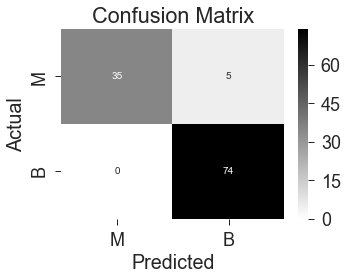

Number of features:  31
Number of outputs:   1
Parameters:  {'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 100, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'auto', 'max_depth': None, 'class_weight': None}
 
                         Importance
Feature                            
radius_worst                  0.127
concave_points_mean           0.125
area_worst                    0.108
perimeter_worst               0.097
concave_points_worst          0.090
area_mean                     0.075
perimeter_se                  0.046
perimeter_mean                0.041
concavity_mean                0.037
concavity_worst               0.036
area_se                       0.035
radius_mean                   0.026
texture_worst                 0.022
compactness_worst             0.019
texture_mean

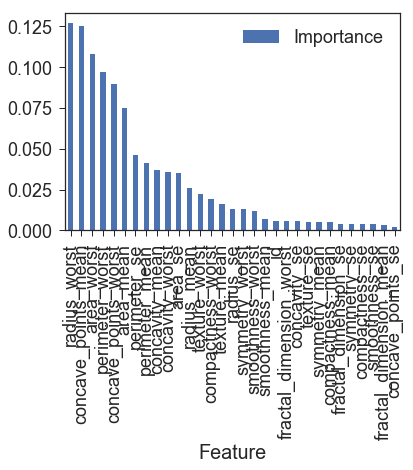

In [18]:
v = ensemble.RandomForestClassifier(n_estimators=100)
y_test = test['diagnosis_bin']
scores = cross_val_score(v, X_train, y_train, cv=10, scoring='accuracy')
v.fit(X_train,y_train)

print "Mean ACCURACY from the cross-validation: %-4.1f%%" % (np.mean(scores)*100.0)
print "Full vector: [%s]" %(','.join(map("{:.3f}".format, scores)))


print "\n--- TRAINING SET ---\n"
print "Accuracy:  %-4.1f%%" % (accuracy_score(y_train, v.predict(X_train))*100.0)
print "Precision: %-4.1f%%" % (precision_score(y_train, v.predict(X_train))*100.0)
print "Recall:    %-4.1f%%" % (recall_score(y_train, v.predict(X_train))*100.0)

print "\n--- TEST SET ---\n"
print "Accuracy:  %-4.1f%%" % (accuracy_score(y_test, v.predict(X_test))*100.0)
print "Precision: %-4.1f%%" % (precision_score(y_test, v.predict(X_test))*100.0)
print "Recall:    %-4.1f%%" % (recall_score(y_test, v.predict(X_test))*100.0)

conf_mat = confusion_matrix(test['diagnosis_bin'], v.predict(X_test)>0.5, labels = [1, 0])
df_cm = pd.DataFrame(conf_mat, index = ['M', 'B'], columns = ['M', 'B'])
plt.figure(figsize = (5,3.5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap = 'binary')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print "Number of features: ", v.n_features_
print "Number of outputs:  ", v.n_outputs_
print "Parameters: ", v.get_params()
print " "

importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(v.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
print importances
importances.plot.bar() 